In [1]:
!wget -O obama.jpg https://static.politifact.com/CACHE/images/politifact/mugs/NYT_OBAMA_1/cc928b085efe30a82c67d885a3d2369a.jpg

--2021-08-21 20:41:47--  https://static.politifact.com/CACHE/images/politifact/mugs/NYT_OBAMA_1/cc928b085efe30a82c67d885a3d2369a.jpg
Resolving static.politifact.com (static.politifact.com)... 104.26.11.134, 172.67.70.32, 104.26.10.134, ...
Connecting to static.politifact.com (static.politifact.com)|104.26.11.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5790 (5.7K) [image/jpeg]
Saving to: ‘obama.jpg’

obama.jpg           100%[===================>]   5.65K  --.-KB/s    in 0s      

2021-08-21 20:41:47 (54.1 MB/s) - ‘obama.jpg’ saved [5790/5790]



In [2]:
from keras.preprocessing import image
# load the image
img = image.load_img('obama.jpg')

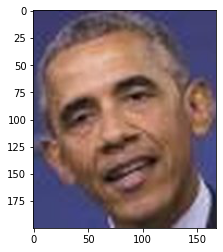

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [4]:
import tensorflow as tf
low_resolution_image = image.img_to_array(img)
low_resolution_image.shape

(200, 168, 3)

In [5]:
# Low Resolution Image of shape [batch_size, height, width, 3]
low_resolution_image = tf.expand_dims(low_resolution_image, 0)
low_resolution_image.shape

TensorShape([1, 200, 168, 3])

In [6]:
import tensorflow_hub as hub
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
super_resolution = model(low_resolution_image) # Perform Super Resolution here
super_resolution.dtype

tf.float32

In [7]:
super_resolution = tf.cast(tf.clip_by_value(super_resolution[0], 0, 255), tf.uint8)
super_resolution.dtype

tf.uint8

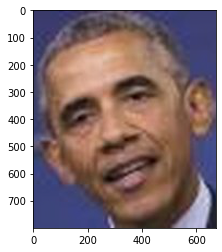

In [8]:
import matplotlib.pyplot as plt
plt.imshow(super_resolution)

In [9]:
from PIL import Image
img  = super_resolution.numpy()
img = Image.fromarray(img, "RGB")
img.save("super_resolution.jpg")